In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

## Machine Learning: Programming Exercise 4

In [12]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import math
import numpy as np

## Neural Networks Learning
In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition.

## 1. Neural Networks

In the previous exercise, you implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the backpropagation algorithm to learn the parameters for the neural network.

### 1.1 Visualizing the data

In [86]:
mat = scipy.io.loadmat('ex4data1.mat')
X = mat['X']
y = mat['y']
X.shape

(5000, 400)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

(-0.5, 19.5, 19.5, -0.5)

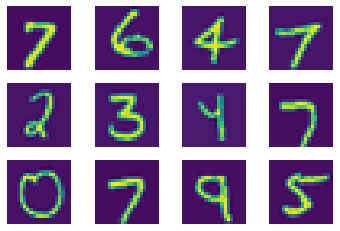

In [87]:
example_nums = 12
idxs = np.random.choice(range(X.shape[0]), example_nums, replace=False)
size = round(math.sqrt(X.shape[1]))

for i, idx in enumerate(idxs):
    plt.subplot(3, 4, i+1)
    plt.imshow(X[idx].reshape(size, size).T.astype('float'))
    plt.axis('off')
plt.show()
plt.close()

### 1.2 Model representation

Our neural network is shown in Figure 2. It has 3 layers- an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. Since the images are of size 20 x 20, this gives us 400 input layer units (not counting the extra bias unit which always outputs +1). 

You have been provided with a set of network parameters $(\Theta^{(1)},\Theta^{(2)})$ already trained by us. These are stored in ex4weights.mat.  Run the code below to load them into Theta1 and Theta2. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [88]:
weights = scipy.io.loadmat('ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Theta1.shape
Theta2.shape

(25, 401)

(10, 26)

### 1.3 Feedforward and cost function
Now you will implement the cost function and gradient for the neural network. First, complete the code in nnCostFunction.m to return the cost. Recall that the cost function for the neural network (without regularization) is

<center> $J(\theta) =\frac{1}{m}{\sum_{i=1}^m\sum_{k=1}^K{\left[-y_k^{(i)} \log((h_{\theta}(x^{(i)}))_k)- (1 -y_k^{(i)}) \log(1- (h_{\theta}(x^{(i)}))_k)\right]}}$ </center>

where $h_\theta(x^{(i)})$ is computed as shown in the Figure 2 and $K = 10$ is the total number of possible labels. Note that $h_\theta(x^{(i)})_k = a^{(3)}_k$ is the activation (output value) of the -th output unit. Also, recall that whereas the original labels (in the variable y) were  for the purpose of training a neural network, we need to recode the labels as vectors containing only values 0 or 1, so that

In [31]:
def sigmoid(z):
    return 1./(1.+np.exp(-1.*z))

In [93]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg):
    '''
    NNCOSTFUNCTION Implements the neural network cost function for a two layer
    neural network which performs classification
    [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, X, y, lambda) 
    computes the cost and gradient of the neural network. 
    The parameters for the neural network are "unrolled" into the vector nn_params 
    and need to be converted back into the weight matrices. 
    The returned parameter grad should be a "unrolled" vector of the partial derivatives of the neural network.
    '''
    # Reshape nn_params back into the parameters Theta1 and Theta2, 
    # the weight matrices for our 2 layer neural network
    Theta1 = nn_params[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = nn_params[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels, hidden_layer_size+1)
    
    # Set up some useful variables
    m = X.shape[0]
    
    
    # Part 1: Feedforward the neural network and return the cost in the variable J
    X = np.concatenate((np.ones((m,1)), X), axis=1) # 5000*401
    z2 = np.dot(Theta1, X.T) # (25*401)*(401*5000)
    a2 = sigmoid(z2) # (25*5000)

    a2 = np.concatenate((np.ones((m,1)), a2.T), axis=1) #(5000*26)
    z3 = np.dot(Theta2, a2.T) #(10*26)*(26*5000)
    h_theta = sigmoid(z3) # h_theta equals a3, (10*5000)
    
    # Recode the labels as vectors containing only values 0 or 1 
    y_new = np.zeros((num_labels, m)) # (10*5000)
    for i in range(m):
        y_new[y[i]-1, i] = 1
    
    
    # Cost without regularization
    J = -((y_new*np.log(h_theta)).sum()+((1-y_new)*np.log(1-h_theta)).sum())/m
    # Add regularization
    J += reg*np.sum(Theta1[:,1:]**2)/(2*m) + reg*np.sum(Theta2[:,1:]**2)/(2*m) 
    
    return J

In [94]:
input_layer_size  = 400   # 20x20 Input Images of Digits
hidden_layer_size = 25    # 25 hidden units
num_labels = 10           # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

# Unroll parameters 
nn_params = np.concatenate((Theta1.flatten(), Theta2.flatten()))

# Weight regularization parameter (we set this to 0 here).
reg = 0 

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg) 

print('Cost at parameters (loaded from ex4weights): ', J) 

Cost at parameters (loaded from ex4weights):  0.2876291651613189


### 1.4 Regularized cost function

The cost function for neural networks with regularization is given by 
<center>$J(\theta) =
\frac{1}{m}\sum_{i=1}^m
\sum_{k=1}^K 
\left[ -y^{(i)}_k \log((h_{\theta}(x^{(i)})_k)- (1 -y^{(i)}_k) \log(1-(h_{\theta}(x^{(i)}))_k)  \right]
\\ \qquad 
+\frac{\lambda}{2m} \left[\sum_{j=1}^{25} 
\sum_{k=1}^{400} {\left( \Theta_{j,k}^{(1)}\right)^2}+
\sum_{j=1}^{10} 
\sum_{k=1}^{25} {\left( \Theta_{j,k}^{(2)}\right)^2}\right]$</center>

In [95]:
# Weight regularization parameter (we set this to 1 here).
reg = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg)
print('Cost at parameters (loaded from ex4weights): ', J) 

Cost at parameters (loaded from ex4weights):  0.38376985909092365


## 2. Backpropagation

### 2.1 Sigmoid gradient
To help you get started with this part of the exercise, you will first implement the sigmoid gradient function. The gradient for the sigmoid function can be computed as 
<center>$g'(z)=\frac{d}{dz}g(z) = g(z)(1-g(z))$</center>
where 
<center>$\mathrm{sigmoid}(z)=g(z)=\frac{1}{1+e^{-z}}$</center>

In [96]:
def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [98]:
# Call your sigmoidGradient function
sigmoidGradient(0)

0.25

### 2.2 Random initialization
When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $[-\epsilon_{int},\epsilon_{init}]$. You should use $\epsilon_{init} = 0.12$*. This range of values ensures that the parameters are kept small and makes the learning more efficient. 

In [101]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in)*2*epsilon_init - epsilon_init
    return W

In [102]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

#  Unroll parameters
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))

*One effective strategy for choosing $\epsilon_{init}$ is to base it on the number of units in the network. A good choice of $\epsilon_{init}$ is $\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in}+L_{out}}}$ where $L_{in} = s_l$ and $L_{out} = s_l+1$ are the number of units in the layers adjacent to $\Theta^{(l)}$.

### 2.3 Backpropagation
Now, you will implement the backpropagation algorithm. Recall that the intuition behind the backpropagation algorithm is as follows. Given a training example $(x^{(t)}, y^{(t)})$, we will first run a 'forward pass' to compute all the  activations throughout the network, including the output value of the hypothesis $h_\Theta(x)$. Then, for each node $j$ in layer $l$, we would like to compute an 'error term' $\delta^{(l)}_j$ that measures how much that node was 'responsible' for any errors in our output. 

For an output node, we can directly measure the difference between the network's activation and the true target value, and use that to define $\delta^{(3)}_j$ (since layer 3 is the output layer). For the hidden units, you will compute $\delta^{(l)}_j$ based on a weighted average of the error terms of the nodes in layer $l+1$. 

In detail, here is the backpropagation algorithm (also depicted in Figure 3). You should implement steps 1 to 4 in a loop that processes one example at a time. Concretely, you should implement a for loop for t = 1:m and place steps 1-4 below inside the for loop, with the $t^{th}$ iteration performing the calculation on the $t^{th}$ training example $(x^{(t)}, y^{(t)})$. Step 5 will divide the accumulated gradients by $m$ to obtain the gradients for the neural network cost function.

1. Set the input layer's values $(a^{(1)})$ to the -th training example $x^{(t)}$. Perform a feedforward pass (Figure 2), computing the activations $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$ for layers 2 and 3. Note that you need to add a  term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit. 

2. For each output unit $k$ in layer 3 (the output layer), set $\delta^{(3)}_k = (a_k^{(3)}-y_k)$ where $y_k\in \{0, 1\}$ indicates whether the current training example belongs to class $k$ $(y_k = 1)$, or if it belongs to a different class $(y_k = 0)$.You may find logical arrays helpful for this task (explained in the previous programming exercise).

3. For the hidden layer $l=2$, set $\delta^{(2)} = (\Theta^{(2)})^T \delta^{(3)}.*g'(z^{(2)})$

4. Accumulate the gradient from this example using the following formula: $\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^T$. Note that you should skip or remove $\delta_0^{(2)}$

5. Obtain the (unregularized) gradient for the neural network cost function by dividing the accumulated gradients by $\frac{1}{m}:$ $\frac{\partial}{\partial\Theta^{(l)}_{ij}} J(\Theta)= D^{(l)}_{ij}= \frac{1}{m}\Delta^{(l)}_{ij}$

In [152]:
def nnGradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg):
    Theta1 = nn_params[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = nn_params[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels, hidden_layer_size+1)
    
    m = X.shape[0]
    
    y_new = np.zeros((num_labels, m)) # (10*5000)
    for i in range(m):
        y_new[y[i]-1, i] = 1
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    X = np.concatenate((np.ones((m,1)), X), axis=1) 
    for t in range(m):
        # Step 1
        a1 = X[t, :] # (1*401)
        z2 = np.dot(Theta1, np.array([a1]).T) # (25*401)*(401*1)
        a2 = sigmoid(z2) # (25*1)
        
        a2 = np.concatenate((np.ones((1,1)), a2), axis=0) # adding a bias (26*1)
        z3 = np.dot(Theta2, a2) # (10*26)*(26*1)
        a3 = sigmoid(z3) # (10*1)
        
        # Step 2
        delta_3 = a3 - y_new[:,t].reshape((10,1)) # (10*1)
        
        # Step 3
        z2 = np.concatenate((np.ones((1,1)), z2), axis=0)
        delta_2 = np.dot(Theta2.T, delta_3) * sigmoidGradient(z2) # ((26*10)*(10*1))=(26*1)
        
        # Step 4
        delta_2 = delta_2[1:] # skipping sigma2(0) (25*1)

        Theta2_grad = Theta2_grad + np.dot(delta_3, a2.T) # (10*1)*(1*26)
        Theta1_grad = Theta1_grad + np.dot(delta_2, a1.reshape((1,401))) # (25*1)*(1*401)
        
    # Step 5
    Theta2_grad = (1/m) * Theta2_grad # (10*26)
    Theta1_grad = (1/m) * Theta1_grad # (25*401)
    
    Theta1_grad[:,1:] = Theta1_grad[:, 1:] + ((reg/m) * Theta1[:,1:]) # for j >= 1 
    Theta2_grad[:,1:] = Theta2_grad[:, 1:] + ((reg/m) * Theta2[:,1:]) # for j >= 1 
    
    grad = np.concatenate((Theta1_grad.flatten(), Theta2_grad.flatten()))
    return grad

In [153]:
grad = nnGradient(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg)

In [170]:
grad[:5]

array([ 8.96387896e-03,  1.27428318e-05,  5.56429417e-07, -2.07790011e-05,
        5.95264497e-06])

### 2.4 Gradient checking

In [171]:
def computeNumericalGradient(J, theta):
    numgrad = np.zeros(theta.shape) 
    perturb = np.zeros(theta.shape) 
    e = 1e-4 
    # Check the first 5 grads
    for p in range(5):
        # Set perturbation vector
        perturb[p] = e
        loss1 = J(theta - perturb, input_layer_size, hidden_layer_size, num_labels, X, y, reg) 
        loss2 = J(theta + perturb, input_layer_size, hidden_layer_size, num_labels, X, y, reg) 
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e) 
        perturb[p] = 0
    return numgrad

In [172]:
num_grad = computeNumericalGradient(nnCostFunction, initial_nn_params)

In [174]:
num_grad[:5]

array([ 8.96387895e-03,  1.27428290e-05,  5.56430457e-07, -2.07790052e-05,
        5.95264282e-06])

### 2.5 Regularized neural networks

In [175]:
reg = 3
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))
grad = nnGradient(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg)
grad[:5]
num_grad = computeNumericalGradient(nnCostFunction, initial_nn_params)
num_grad[:5]

array([ 8.96387896e-03,  3.82284953e-05,  1.66928825e-06, -6.23325591e-05,
        1.78636072e-05])

array([ 8.96387895e-03,  3.82284915e-05,  1.66929137e-06, -6.23325658e-05,
        1.78636039e-05])

In [176]:
reg = 3
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg)

In [177]:
debug_J

0.5760512469501331